<center> In the name of God <center>

# <center> Sharif University of Technology <center> Department of Economics <center>
# <center> Quantitative Economics - Spring 2022 <center>Problem Set 11<center>

##  <center> Team Members <center>
<center> - Niloofar Moradi <center>- Mohamad R. Manzaritavakoli <center>

In [ ]:
using Plots
using BlackBoxOptim
using GLM
using StatsPlots
using StatsBase
using ForwardDiff
using Roots
using Interpolations
using Optim
using Random
using Distributions
using BenchmarkTools

In [2]:
Plots.theme(:juno)

# 3 Log-Linearization Method

# 1. Use Log-Linearization Method and solve the following Bellman Equation:

$$
y-c = k^{\prime} - (1-\delta)k = k^{\prime} \rightarrow \delta = 1
$$
$$
V(k)=\max_{k'}\left\{\frac{(\xi k^{\alpha} - k')^{1-\delta}}{1- \delta}+\beta E[ V\left(k^{\prime} \right)]\right\}
$$
$$
[k^{\prime}] : \left(\xi k^{\alpha} - k^{\prime} \right)^{-\sigma} = \beta E[ V^{\prime} \left(k^{\prime} \right)]
$$
$$
[k] : V'(k) = \alpha \xi k^{\alpha - 1} \left(\xi k^{\alpha} - k^{\prime} \right)^{-\sigma}
$$
$$
\rightarrow in \ steady \ state:
$$
$$
k=k^{\prime} \Rightarrow \left(\xi k^{\alpha} - k \right)^{-\sigma} = \beta E \left[\alpha \xi k^{\alpha - 1}(\xi k^{\alpha} - k^{\prime})^{-\sigma} \right]
$$
$$
\begin{aligned}
\rightarrow\left(\xi k_{s s}^{\alpha}-k_{s s}\right)^{-\sigma} &=\beta E\left[\xi_{s s} \alpha k_{s s}^{\alpha-1}\left(\xi^{\prime} k_{s s}^{\alpha}-k_{s s}\right)^{-\sigma}\right] \\
\rightarrow 1 &=\beta\left[\xi_{s s} \alpha k_{s s}^{\alpha-1}\right] \\
& \rightarrow \frac{1}{\beta}=\xi_{s s} \alpha k_{s s}^{\alpha-1}
\end{aligned}
$$

$$
\begin{gathered}
\frac{1}{\beta}=\rho+1 \\
\rightarrow \rho+1=\xi_{s s} \alpha k_{s s}^{\alpha-1} \\
\rightarrow k_{s s}=\left(\frac{\rho+1}{\xi_{s s} \alpha}\right)^{\frac{1}{\alpha-1}} \\
\rightarrow k_{s s}=\left(\frac{\xi_{s s} \alpha}{\rho+1}\right)^{\frac{1}{1-\alpha}}
\end{gathered}
$$

Now we  use log-lin on euler equation:
$$
\left(\xi k^{\alpha}-k^{\prime}\right)^{-\sigma}=\beta E\left[\xi^{\prime} \alpha k^{\prime \alpha-1}\left(\xi^{\prime} k^{\prime \alpha}-k^{\prime \prime}\right)^{-\sigma}\right]
$$

$$
-\sigma\left(\frac{\bar{\xi} \bar{k}^{\alpha}}{\overline{\xi k^{\alpha}}-\bar{k}}(\hat{\xi}+\alpha \hat{k})-\frac{\bar{k}}{\overline{\xi k} \alpha-\bar{k}} \hat{k}^{\prime}\right)=E\left[\hat{\xi}^{\prime}+(\alpha-1) \hat{k}^{\prime}-\sigma\left(\frac{\bar{\xi} \bar{k}^{\alpha}}{\overline{\xi k^{\alpha}}-\bar{k}}\left(\hat{\xi}^{\prime}+\alpha \hat{k}^{\prime}\right)-\frac{\bar{k}}{\overline{\xi k}{ }^{\alpha}-\bar{k}} \hat{k}^{\prime \prime}\right)\right]
$$

$$
\frac{\overline{\xi k}^{\alpha}}{\xi k^{\alpha}-k}=\frac{\xi_{s s}\left(\frac{\xi_{s s} \alpha}{\rho+1}\right)^{\frac{\alpha}{1-\alpha}}}{\xi_{s s}\left(\frac{\xi_{s s} \alpha}{\rho+1}\right)^{\frac{\alpha}{1-\alpha}}-\left(\frac{\xi_{s s} \alpha}{\rho+1}\right)^{\frac{1}{1-\alpha}}}
$$

$$
\rightarrow \frac{\overline{\xi k}^{\alpha}}{\overline{\xi k} \alpha-\bar{k}}=\frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s s} \alpha}}
$$

We also have:
$$
\frac{\bar{k}}{\xi k^{\alpha}-k}=\frac{\left(\frac{\xi_{\operatorname{san}} \alpha}{\rho+1}\right)^{\frac{1}{1-\alpha}}}{\xi_{s s}\left(\frac{\xi_{\operatorname{sa}} \alpha}{\rho+1}\right)^{\frac{\alpha}{1-\alpha}}-\left(\frac{\xi_{\text {ss }} \alpha}{\rho+1}\right)^{\frac{1}{1-\alpha}}}
$$

$$\rightarrow \frac{\bar{k}}{\overline{\xi k} \alpha-\bar{k}}=\frac{1}{\xi_{s s} \frac{\rho+1}{\xi_{s s} \alpha}-1}=\frac{1}{\frac{\rho+1}{\alpha}-1}$$

The guess would be:
$$
k_{t+1}=a k_{t}+b \xi_{t}
$$

$$
\rightarrow \hat{k}^{\prime}=a \hat{k}+b \hat{\xi}
$$
$$
\rightarrow \hat{k}^{\prime \prime}=a \hat{k}^{\prime}+b \hat{\xi}^{\prime}
$$
$$
\rightarrow \hat{k}^{\prime \prime}=a(a \hat{k}+b \hat{\xi})+b \hat{\xi}^{\prime}
$$
and if we substitute this guess:
$$
-\sigma\left(\frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s s \alpha}}}(\hat{\xi}+\alpha \hat{k})-\frac{1}{\frac{\rho+1}{\alpha}-1}(a \hat{k}+b \hat{\xi})\right)
$$
$$
=E\left[\hat{\xi}^{\prime}+(\alpha-1)(a \hat{k}+b \hat{\xi})-\sigma\left(\frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s s} a}}\left(\hat{\xi}^{\prime}+\alpha(a \hat{k}+b \hat{\xi})\right)-\frac{1}{\frac{\rho+1}{a}-1}\left(a(a \hat{k}+b \hat{\xi})+b \hat{\xi}^{\prime}\right)\right)\right]
$$

We can get rid of the expected value:
$$
\begin{gathered}
-\sigma\left(\frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s s} \alpha}}(\hat{\xi}+\alpha \hat{k})-\frac{1}{\frac{\rho+1}{\alpha}-1}(a \hat{k}+b \hat{\xi})\right) \\
=(\alpha-1)(a \hat{k}+b \hat{\xi})-\sigma\left(\frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{*} \alpha}}(\alpha(a \hat{k}+b \hat{\xi}))-\frac{1}{\frac{\rho+1}{\alpha}-1}(a(a \hat{k}+b \hat{\xi}))\right.
\end{gathered}
$$

$$
A \hat{k}+B \hat{\xi}=0
$$
The only possible solution is:
$$
A=B=0
$$

The final sulotion 
for $K$:
$$
-\sigma \alpha \frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s s \alpha}}}+\sigma a \frac{1}{\frac{\rho+1}{\alpha}-1}=(\alpha-1) a-\sigma \alpha a \frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s s \alpha}}}+\sigma a^{2} \frac{1}{\frac{\rho+1}{\alpha}-1}
$$
for $\xi$ :
$$

$$
-\sigma \frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s s} \alpha}}+\sigma b \frac{1}{\frac{\rho+1}{\alpha}-1}=(\alpha-1) b-\sigma \alpha b \frac{\xi_{s s}}{\xi_{s s}-\frac{\rho+1}{\xi_{s a} \alpha}}+\sigma a b \frac{1}{\frac{\rho+1}{\alpha}-1}
$$

We can use the first equation and obtain a, then by using that answer we can obtain b from the second equation.

## 2. Compare your results with the numerical solution form the Value Function Iteration Class.

We first import our code in question one in order to get policy function:

In [13]:
σ = 0.1
α = 0.65
ω = 0.5
β = 0.95
N = 100
ϵ= 10^(-2);
Random.seed!(1394)
ζ=exp.(rand(Normal(0,ω),N));
A=mean(ζ);

In [14]:
function VFI(α,N,β,σ,ω,ϵ)
    Random.seed!(1394)
    ζ=exp.(rand(Normal(0,ω),N));
    A=mean(ζ);
    y_star =A^(1/(1-α)) * (β* α)^(α/(1-α))
    ygrid = range(0.0, y_star*2, N)
    Initial_V(y)=y
    U(c) = (1/(1-σ)) * c^(1-σ)
    f(k)=k^α
    V₀ = Initial_V.(ygrid)
    Vⱼ = V₀
    h = zeros(N)
    Vⱼ₊₁ = zeros(N)
    g = zeros(N) 
    dist = 1
    while ~(isapprox(dist, 0.0; atol=ϵ, rtol=0))
        V = LinearInterpolation(ygrid, Vⱼ[:,end],extrapolation_bc=Line())
        for i ∈ 1:N
            Ω(c) = -(U(c) + β*mean(V.(ζ .* f(ygrid[i]-c))))
            opt = optimize(Ω, 0, ygrid[i])
            g[i] = opt.minimizer
            Vⱼ₊₁[i] = -Ω(g[i])
        end
        h = hcat(h,g)
        Vⱼ = hcat(Vⱼ,Vⱼ₊₁)
        dist = maximum(abs.(Vⱼ[:,end] .- Vⱼ[:,end-1]))
    end
    return Vⱼ, h
end

VFI (generic function with 1 method)

In [15]:
V, h = VFI(α,N,β,σ,ω,ϵ);
y_star =A^(1/(1-α)) * (β* α)^(α/(1-α))

0.49818350811148776

In [16]:
policy_function=LinearInterpolation(range(0.0, y_star*2, N), h[:,end],extrapolation_bc=Line())

100-element extrapolate(scale(interpolate(::Vector{Float64}, BSpline(Linear())), (0.0:0.01006431329518157:0.9963670162229755,)), Line()) with element type Float64:
 0.0
 9.816921176005178e-11
 1.6614161889264952e-8
 2.9230403984102947e-7
 2.040709210273279e-6
 8.867170252356265e-6
 2.7811519666433832e-5
 7.225979225388119e-5
 0.00016110964975416228
 0.00031463697565004993
 0.0005656058420522715
 0.0009666250131579012
 0.0015356892088216156
 ⋮
 0.5086704138698733
 0.5173070428468803
 0.5259718580101221
 0.5346847385327618
 0.5433535639343782
 0.552183138619204
 0.560867386666573
 0.5694308029994926
 0.5781837380787791
 0.5870637839825232
 0.5957495368465968
 0.6045512435467666

In [17]:
N=100
a=-1/10
b=-2/10

-0.2

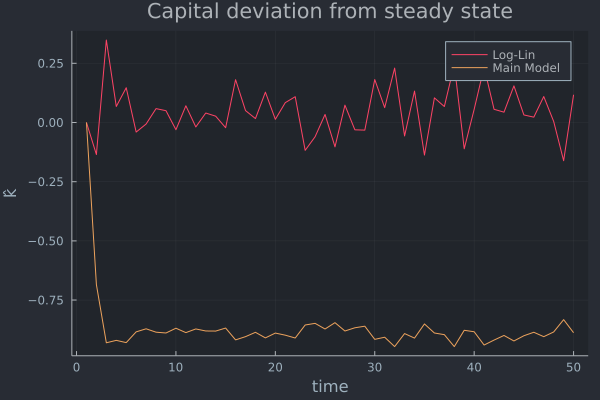

In [18]:
Random.seed!(1394)
shockₓ =rand(LogNormal(0,ω),N)
detrended_shockₓ=log.(shockₓ) .- log(mean(LogNormal(0,ω)))
k=zeros(N)

for i=1:99
    k[i+1]=a*k[i]+b*detrended_shockₓ[i] 
end

plot(k[1:50],label="Log-Lin")

y=zeros(N)
k=zeros(N)
c=zeros(N)
k̂=zeros(N)
k[1]=(1/β*A*α)^(1/(α-1)) # k_staedy state
for i=1:99
    y[i]=shockₓ[i]*k[i]^α
    c[i]=policy_function(y[i])
    k[i+1]=y[i]-c[i]
    k̂[i]=(k[i]-((1/β*A*α)^(1/(α-1))))/((1/β*A*α)^(1/(α-1)))
end
plot!(k̂[1:50],xlabel="time",ylabel="k̂",title="Capital deviation from steady state",label="Main Model")


## 3. Use Log-Linearization Method and solve the following Bellman Equation:


$$
[k] : V' = \frac{\left(1-\sigma \right) \left(\alpha k^{\alpha - 1} S + \left(1-\delta \right) \right) (Sk^{\alpha} + (1-\delta)k - k')^{-\sigma}}{1-\sigma}
$$
$$
[k'] : \frac{\left(1-\sigma \right) (+1) (Sk^{\alpha} + (1-\delta)k - k')^{-\sigma}}{1-\sigma} = \beta E(V')
$$
$$
(Sk^{\alpha} + (1-\delta)k - k')^{-\sigma} = \beta E \left( (\alpha k^{\alpha - 1} S + (1-\delta)) (Sk^{\alpha} + (1-\delta)k - k')^{-\sigma} \right)
$$
Steady State:
$$
(k^{\alpha} -\delta k)^{-\sigma} =  \beta \left( (\alpha k^{\alpha - 1} + (1-\delta)) (k^{\alpha} -\delta k)^{-\sigma} \right) \\
\rightarrow \bar{k} = \left( \left( \frac{1}{\beta} - \left(1-\delta \right) \right) \frac{1}{\alpha}\right)^{\frac{1}{1-\alpha}} \\
\rightarrow \bar{k} = \left( \frac{\alpha}{\rho + \delta} \right)^{\frac{1}{1-\alpha}}
$$
$$
diff: (-\sigma)(k^{\alpha} -\delta k)^{-\sigma} (k^{\alpha} ds - \delta dk) = \\
\beta \left[ \left( \alpha (\alpha -1) k^{\alpha -2}dk \right) (k^{\alpha} - \delta k)^{-\sigma} - \sigma (k^{\alpha} - \delta k)^{-\sigma -1}(\alpha k^{\alpha -1} dk - \delta dk) \right]
$$
$$
(-\sigma) \left(k^{\alpha} \hat{s} - \delta k \hat{k} \right) = 
\left[ \frac{\alpha (\alpha - 1) k^{\alpha -1}}{\alpha k^{\alpha -1} + 1 - \delta} \hat{k} - \left( \frac{\sigma}{k^{\alpha} - \delta k} \right) 
\left( \frac{\alpha k^{\alpha} \hat{k} - \delta k \hat{k}}{\alpha k^{\alpha - 1} + 1 - \delta } \right) \right]
$$
$$
\hat{S}_t = \left( \frac{\alpha (1-\alpha)}{\sigma \left( \alpha k^{2\alpha -1} + (1-\delta)k^{\alpha} \right)} + \frac{1}{k^{\alpha} - \delta k}. \frac{\alpha k^{\alpha} - \delta k}{\alpha k^{2\alpha -1} + (1-\delta)k^{\alpha}} + \delta k^{1-\alpha} \right) \hat{K}_t \\
k = \bar{k} = \left( \frac{\alpha}{\rho + \delta} \right)^{\frac{1}{1-\alpha}}
$$
$$
\hat{S}_t = \left[ \frac{\alpha (1-\alpha)}{\sigma} + \frac{\alpha \bar{k}^{\alpha} - \delta \bar{k}}{\bar{k}^{\alpha} - \delta \bar{k}} + \delta \left( \alpha \bar{k}^{\alpha} + (1-\delta)\bar{k} \right) \right] \hat{K}_t \\
\bar{k} = \left( \frac{\alpha}{\rho + \delta} \right)^{\frac{1}{1-\alpha}}
$$

Euler equation:
$$
-\left(s k^{\alpha}+(1-\delta) k-k^{\prime}\right)^{-\sigma}+\beta E\left[\left(s^{\prime} k^{\rho o}+(1-\delta) k^{\prime}-k^{n}\right)^{-\theta}\left(s^{\prime} \alpha k^{p a-1}+1-\delta\right)\right]=0
$$

We can implement log-lin on this equation as below:
$$
\begin{gathered}
\sigma\left(\frac{\hat{k}^{\alpha}}{k^{\alpha}-\delta k}(\hat{s}+\alpha \hat{k})+\frac{(1-\delta) \hat{k}}{\hat{k}^{\alpha}-\delta k} \hat{k}-\frac{\bar{k}}{k^{\alpha}-\delta k^{\prime}}\right) \\
+E\left[-\sigma\left(\frac{\bar{k}^{\alpha}}{k^{\alpha}-\delta k}\left(\hat{s}^{\prime}+\alpha \hat{k}^{\prime}\right)+\frac{(1-\delta) \bar{k}}{k^{\alpha}-\delta k} \hat{k}^{\prime}-\frac{\bar{k}}{k^{\alpha}-\delta k} \hat{k}^{\prime \prime}\right)+\frac{\alpha \bar{k}^{\alpha-1}}{\alpha k^{\alpha-1}+1-\delta}\left(\hat{s}^{\prime}+(\alpha-1) \hat{k}^{\prime}\right)\right]=0
\end{gathered}
$$

We can simplify the fractions:
$$
\frac{\bar{k}^{a}}{k^{\alpha}-\delta k}=\frac{1}{1-\delta k^{1-\alpha}}=\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}}
$$
The socond fraction:
$$
\frac{\bar{k}}{k^{\alpha}-\delta k}=\frac{1}{k-\alpha-1-\delta}=\frac{1}{\frac{\rho+\delta}{\alpha}-\delta}
$$
The third fraction:
$$
\begin{gathered}
\frac{(1-\delta) \bar{k}}{k^{\alpha}-\delta k}=\frac{1-\delta}{k^{\alpha-1}-\delta}=\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta} \\
\frac{\alpha \bar{k}^{\alpha-1}}{\alpha k^{-a-1}+1-\delta}=\frac{\rho+\delta}{1+\rho}
\end{gathered}
$$
So the equation is:
$$
\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}}(\hat{s}+\alpha \hat{k})+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta} \hat{k}-\frac{1}{\frac{\rho+\delta}{a}-\delta} \hat{k}^{\prime}\right)
+E\left[-\sigma\left(\frac{1}{1-\delta \frac{\sigma}{\rho+\delta}}\left(\vec{s}^{\prime}+\alpha \hat{k}^{\prime}\right)+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta} \hat{k}^{\prime}-\frac{1}{\frac{\rho+\delta}{\alpha}-\delta} \hat{k}^{\prime \prime}\right)+\frac{\rho+\delta}{1+\rho}\left(\vec{s}^{\prime}+(\alpha-1) \hat{k}^{\prime}\right)\right]=0
$$



Now we guess a policy function:
$$
\hat{k}=a \hat{k}+b \hat{s}
$$
$$
\rightarrow \hat{k}^{\prime \prime}=a(a \hat{k}+b \hat{s})+b \hat{s}^{\prime}=a^{2} \hat{k}+a b \hat{s}+b \hat{s}^{\prime}
$$

By substituting:
$$
\begin{gathered}
\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}}(\hat{s}+\alpha \hat{k})+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta} \hat{k}-\frac{1}{\frac{\rho+\delta}{\alpha}-\delta}(a \hat{k}+b \hat{s})\right) \\
+E\left[-\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}}\left(\hat{s}^{\prime}+\alpha(a \hat{k}+b \hat{s})\right)+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta}(a \hat{k}+b \hat{s})-\frac{1}{\frac{\rho+\delta}{\alpha}-\delta}\left(a^{2} \hat{k}+a b \hat{s}+b \hat{s}^{\prime}\right)\right)\right. \\
\left.+\frac{\rho+\delta}{1+\rho}\left(\hat{s}^{\prime}+(\alpha-1)(a \hat{k}+b \hat{s})\right)\right]=0
\end{gathered}
$$


We also know:
$$
E\left[s^{\prime}\right]=E[\eta s+\epsilon]
$$
and since $E[\epsilon]=0$
$$
\begin{gathered}
E\left[s^{\prime}\right]=\eta s \\
\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}}(\hat{s}+\alpha \hat{k})+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta} \hat{k}-\frac{1}{\frac{\rho+\delta}{\alpha}-\delta}(a \hat{k}+b \hat{s})\right) \\
-\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}}(\eta \hat{s}+\alpha(a \hat{k}+b \hat{s}))+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta}(a \hat{k}+b \hat{s})-\frac{1}{\frac{\rho+\delta}{a}-\delta}\left(a^{2} \hat{k}+a b \hat{s}+b \eta \hat{s}\right)\right) \\
+\frac{\rho+\delta}{1+\rho}(\eta \hat{s}+(\alpha-1)(a \hat{k}+b \hat{s}))=0
\end{gathered}
$$
This is a equation in which:
$$
A \hat{k}+B \hat{s}=0
$$


$$
\begin{aligned}
&A=B=0\\
&A=\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}} \alpha+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta}-\frac{1}{\frac{\rho+\delta}{\alpha}-\delta} \alpha\right)-\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}} \alpha a+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta} a\right.\\
&\left.-\frac{1}{\frac{\rho+\delta}{\alpha}-\delta} \alpha^{2}\right)+\frac{\rho+\delta}{1+\rho}(\alpha-1) a=0\\
&B=\sigma\left(\frac{1}{1-\delta \frac{\alpha}{\rho+\delta}} \frac{1}{\frac{\rho+\delta}{\alpha}-\delta} b\right)-\sigma\left(\frac{1}{1-\delta \frac{a}{\rho+\delta}}(\eta)+\alpha b\right)+\frac{1-\delta}{\frac{\rho+\delta}{\alpha}-\delta} b\\
&\left.-\frac{1}{\frac{\rho+\delta}{\alpha}-\delta}(a b+b \eta)\right)+\frac{\rho+\delta}{1+\rho}(\alpha-1) b=0
\end{aligned}
$$

We can use the first equation and obtain a, then by using that answer we can obtain b from the second equation.

# 4 Discrete Dynamic Programming

## 4.1 Consumption Saving Problem with Discrete Dynamic Programming

In [3]:
r = 0.1
σ = 0.8
ω = 1
β = 0.93
s₀=0
s₁=1
N = 1000
ϵ = 10^-2;

In [4]:
function DDP(r, σ, ω, β, s₀, s₁, N,ϵ)
    aₘₐₓ = 5.0
    aₘᵢₙ = 0.0
    U(a, a′, s) = (1 + r)*a + ω*s - a′ > 0. ? ((1 + r)*a + ω*s - a′)^(1 - σ) / (1 - σ) : 0.
    Γ(a, s) = min((1 + r)*a + ω*s, aₘₐₓ)
    a_grid = collect(range(aₘᵢₙ, aₘₐₓ, length = N))
    V₁ = [a_grid]
    V₂ = [a_grid] 
    Vⱼ₁ = zeros(N)
    Vⱼ₂ = zeros(N) 
    #because we use R in for
    R₁ = zeros(N, N)
    R₂ = zeros(N, N)
    for i ∈ 1:N
        R₁[i, :] .= U.(a_grid[i], a_grid, s₀)
        R₂[i, :] .= U.(a_grid[i], a_grid, s₁)
    end
    P = 0.5 #Beacause shocks are IID.
    Ω₁ = zeros(N, N)
    Ω₂ = zeros(N, N)
    dist = 1
    while ~(isapprox(dist, 0.0; atol=ϵ, rtol=0))
        Ω₁ = zeros(N, N)
        Ω₂ = zeros(N, N)
        for i ∈ 1:N
            a₁ⱼ = a_grid .<= Γ(a_grid[i], s₀)
            a₂ⱼ = a_grid .<= Γ(a_grid[i], s₁)
            Ω₁[i, a₁ⱼ] .= R₁[i, a₁ⱼ] .+ β .* P .* (V₁[end][a₁ⱼ] .+ V₂[end][a₁ⱼ])
            Ω₂[i, a₂ⱼ] .= R₂[i, a₂ⱼ] .+ β .* P .* (V₁[end][a₂ⱼ] .+ V₂[end][a₂ⱼ])
        end
        Vⱼ₁ = vec(maximum(Ω₁, dims = 2))
        Vⱼ₂ = vec(maximum(Ω₂, dims = 2))
        dist = maximum([maximum(abs.(Vⱼ₁ .- V₁[end])), maximum(abs.(Vⱼ₂ .- V₂[end]))])
        append!(V₁, [Vⱼ₁])
        append!(V₂, [Vⱼ₂])
    end
    a₁′ = [a_grid[argmax(Ω₁[i, :])] for i ∈ 1:N]
    a₂′ = [a_grid[argmax(Ω₂[i, :])] for i ∈ 1:N]
    return V₁,LinearInterpolation(a_grid, a₁′), V₂, LinearInterpolation(a_grid, a₂′), a_grid
end

DDP (generic function with 1 method)

## 4.2 Consumption Saving Problem with Continuous Maximization Methods.

In [5]:
function CMM(r, σ, ω, β, s₀, s₁, N, ϵ; initial_guess_1= missing, initial_guess_2 = missing)
    aₘₐₓ = 5.0
    aₘᵢₙ = 0.0
    U(a, a′, s) = (1 + r)*a + ω*s - a′ > 0. ? ((1 + r)*a + ω*s - a′)^(1 - σ) / (1 - σ) : 0.
    Γ(a, s) = min((1 + r)*a + ω*s, aₘₐₓ)
    a_grid = collect(range(aₘᵢₙ, aₘₐₓ, length = N))
    a_grid = collect(range(aₘᵢₙ, aₘₐₓ, length = N))
    V₁ = [a_grid]
    V₂ = [a_grid] 
    if !ismissing(initial_guess_1)
        V₁ = [initial_guess_1]
    end
    if !ismissing(initial_guess_2)
        V₂ = [initial_guess_2]
    end
    a₁′ = zeros(N)
    a₂′ = zeros(N)
    Vⱼ₁ = zeros(N)
    Vⱼ₂ = zeros(N)
    dist = 1
    while ~(isapprox(dist, 0.0; atol=ϵ, rtol=0))
        V₀₁ = LinearInterpolation(a_grid, V₁[end])
        V₀₂ = LinearInterpolation(a_grid, V₂[end])
        for i ∈ 1:N
            Ω₁(a′) = -(U(a_grid[i], a′, s₀) + β * V₀₁(a′))
            Ω₂(a′) = -(U(a_grid[i], a′, s₁) + β * V₀₂(a′))
            a₁′[i] = optimize(Ω₁, 0.0, Γ(a_grid[i], s₀)).minimizer
            a₂′[i] = optimize(Ω₂, 0.0, Γ(a_grid[i], s₁)).minimizer
            Vⱼ₁[i] = -Ω₁(a₁′[i])
            Vⱼ₂[i] = -Ω₂(a₂′[i])
        end
        dist = maximum([maximum(abs.(Vⱼ₁ .- V₁[end])), maximum(abs.(Vⱼ₂ .- V₂[end]))])
        append!(V₁, [Vⱼ₁])
        append!(V₂, [Vⱼ₂])
        Vⱼ₁ = zeros(N)
        Vⱼ₂ = zeros(N)
    end
    
    return V₁, LinearInterpolation(a_grid, a₁′), V₂, LinearInterpolation(a_grid, a₂′), a_grid
end

CMM (generic function with 1 method)

In [6]:
V₁, h₁, V₂, h₂, a_grid = DDP(r, σ, ω, β, s₀, s₁, N,ϵ)
pf_d(x) = h₁(x)
p1 = plot(pf_d, a_grid, title = "Policy Function", legend = false)
p2 = plot(a_grid, V₁, title = "Value Function Iterations for s₀", legend = false)
p3 = plot(a_grid, V₂, title = "Value Function Iterations for s₁", legend = false)
plot(p1, p2, p3, layout = (3, 1), size = (700, 1200), framestyle = :box)

In [7]:
V₁, h₁, V₂, h₂, a_grid = CMM(r, σ, ω, β, s₀, s₁, N, ϵ)
pf_c(x) = h₂(x)
p1 = plot(pf_c, a_grid, title = "Policy Function", legend = false)
p1 = plot!(a_grid, a_grid, color="yellow") #45 degrees line
p2 = plot(a_grid, V₁, title = "Value Function Iterations for s₀", legend = false)
p3 = plot(a_grid, V₂, title = "Value Function Iterations for s₁",legend = false)
plot(p1, p2, p3, layout = (3, 1), size = (700, 1200), framestyle = :box)

### Comparing the results

In [8]:
N_new = 100
println("runnig time of the DDP Runtime with N=100:")
@btime DDP(r, σ, ω, β, s₀, s₁, N_new,ϵ);

runnig time of the DDP Runtime with N=100:
  72.929 ms (142469 allocations: 55.48 MiB)


In [9]:

println("runnig time of CMM with N=100:")
@btime CMM(r, σ, ω, β, s₀, s₁, N_new, ϵ);

runnig time of CMM with N=100:
  1.932 s (15659221 allocations: 267.45 MiB)


The DDP Function is about 24 times faster than CMM Function.

## 4.3 Using the Discrete version for the initial guess of the Continuous version

In [10]:
function Bellman_Solver_mixed(r, σ, ω, β, s₀, s₁, N_new,ϵ)
    V₁, h₁, V₂, h₂, a_grid = DDP(r, σ, ω, β, s₀, s₁, N_new,ϵ)
    V₁_, h₁_, V₂_, h₂_, a_grid_ = CMM(r, σ, ω, β, s₀, s₁, N_new, ϵ, initial_guess_1 = V₁[end], initial_guess_2 = V₂[end])
    return V₁_, h₁_, V₂_, h₂_, a_grid_
end

Bellman_Solver_mixed (generic function with 1 method)

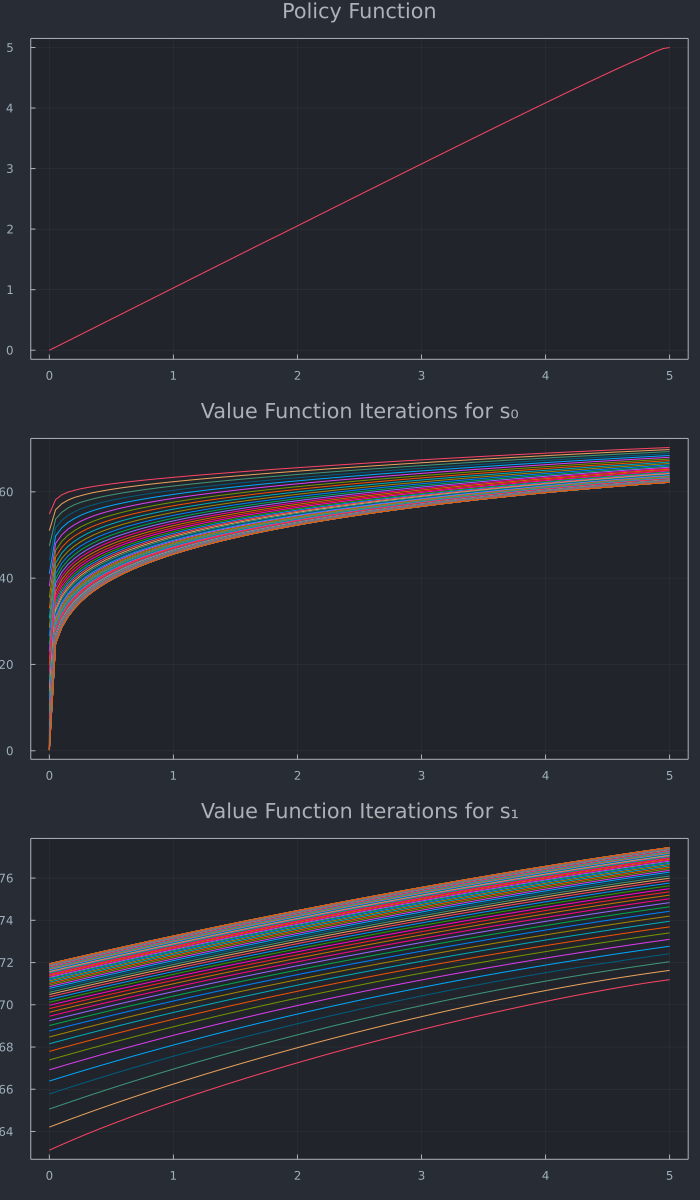

In [11]:
V₁, h₁, V₂, h₂, a_grid = Bellman_Solver_mixed(r, σ, ω, β, s₀, s₁, N_new,ϵ);
pf_m(x) = h₁(x)
p1 = plot(pf_m, a_grid, title = "Policy Function", legend = false)
p2 = plot(a_grid, V₁, title = "Value Function Iterations for s₀", legend = false)
p3 = plot(a_grid, V₂, title = "Value Function Iterations for s₁",legend = false)
plot(p1, p2, p3, layout = (3, 1), size = (700, 1200), framestyle = :box)

In [12]:
println("runnig time of Bellman_Solver_mixed with N=100:")
@btime Bellman_Solver_mixed(r, σ, ω, β, s₀, s₁, N_new,ϵ);

runnig time of Bellman_Solver_mixed with N=100:
  2.497 s (15183214 allocations: 312.33 MiB)
